In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import pandas as pd

In [22]:

# Setup Chrome options
chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

#list to store data
l = []
#dictionary to store data
d={}
#open chrome
driver = webdriver.Chrome(options=chrome_options)

#Target URL
url = "https://www.glassdoor.com/Job/united-arab-emirates-all-jobs-SRCH_IL.0,20_IN6_KO21,24.htm"

#open URL
driver.get(url)
driver.maximize_window()
time.sleep(5)

response = driver.page_source
driver.close()

In [23]:
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/">
 <head>
  <title>
   22,815 all Jobs in United Arab Emirates, February 2025 | Glassdoor
  </title>
  <meta content="Glassdoor" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="https://www.glassdoor.com/assets/images/meta/logo-og.png" property="og:image"/>
  <meta content="22,815 all Jobs in United Arab Emirates, February 2025" property="og:title"/>
  <meta content="Search All jobs in United Arab Emirates with company ratings &amp; salaries. 22,815 open jobs for All in United Arab Emirates." property="og:description"/>
  <meta content="https://www.glassdoor.com/Job/united-arab-emirates-all-jobs-SRCH_IL.0,20_IN6_KO21,24.htm" property="og:url"/>
  <meta content="Glassdoor" property="al:ios:app_name"/>
  <meta content="589698942" property="al:ios:app_store_id"/>
  <meta content="Search All jobs in United Arab Emirates with company ratings &amp; sala

In [24]:
JobsContainer = soup.find("ul",{"class":"JobsList_jobsList__lqjTr"})

Jobs = JobsContainer.find_all("li")

In [31]:
for job in Jobs:
    try:
        d["company_name"]=job.find("span",{"class":"EmployerProfile_compactEmployerName__9MGcV"}).text
    except:
        d["company_name"]=None
    try:
        d["job_title"]=job.find("a",class_="JobCard_jobTitle__GLyJ1").text
    except:
        d["job_title"]=None
    try:
        d["job_location"]=job.find("div",{"class":"JobCard_location__Ds1fM"}).text
    except:
        d["job_location"]=None
    try:
        d["job_salary"]=job.find("div",{"class":"JobCard_salaryEstimate__QpbTW"}).text
    except:
        d["job_salary"]=None
    try:
        d["job_description"]=job.find("div",{"class":"JobCard_jobDescriptionSnippet__l1tnl"}).text
    except:
        d["job_description"]=None
    l.append(d.copy())
    

In [32]:
df = pd.DataFrame(l)
df.to_csv("glassdoorjobs.csv",index=False)
print(df)


                      company_name                                job_title  \
0                      VIVO HEALTH  Cosmetic Dermatologist on Revenue Basis   
1         Anaat Beauty Spa & Salon                 Nail Technician (Artist)   
2                           Gerbou                            Head Hostesss   
3           7 Emirates Real Estate               Senior Property Consultant   
4                     Confidential                          Nail Technician   
..                             ...                                      ...   
115                  Beauty Lounge             Senior Nail/ lash technician   
116    Val Morgan Consultancy DMCC                      Document Controller   
117                            Aaa                              Media Buyer   
118                    On Point 3D                           General Helper   
119  Divine Bricks Real Estate LLC                   Real Estate Consultant   

       job_location                        job_sala

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("glassdoorjobs.csv")
df.head()

,company_name,job_title,job_location,job_salary,job_description
0,VIVO HEALTH,Cosmetic Dermatologist on Revenue Basis,Sharjah,NaN,*Valid medical license* to practice as a derma...
1,Anaat Beauty Spa & Salon,Nail Technician (Artist),Ras al-Khaimah,AED 4K (Employer est.),"2 - 5 years of experience as a Nail Artist, wi..."
2,Gerbou,Head Hostesss,Dubai,AED 4K - AED 7K (Employer est.),Ensure the *seating process is smooth and effi...
3,7 Emirates Real Estate,Senior Property Consultant,Dubai,AED 3K - AED 4K (Employer est.),*Must have a Valid Dubai driving license*. Con...
4,Confidential,Nail Technician,Abu Dhabi,AED 3K - AED 4K (Employer est.),Candidate needs to be Available To start Immed...


In [3]:
#Cleaning the data
df['job_salary'] = df['job_salary'].str.replace(r'\(.*?\)','', regex=True).str.strip()
df['job_salary'] = df['job_salary'].str.replace('to','', regex=True).str.strip()

In [4]:

def convert_salary(salary):
    if pd.isna(salary) or salary == '':
        return None  # Handle missing or empty values
    
    # Remove currency symbols (AED) and extra spaces
    salary = salary.replace('AED', '').strip()
    
    # If there's a range (e.g., "3K - 4K")
    if '-' in salary:
        min_salary, max_salary = salary.split('-')
        min_salary = float(min_salary.replace('K', '').strip()) * 1000
        max_salary = float(max_salary.replace('K', '').strip()) * 1000
        return (min_salary + max_salary) / 2  # Return average
    
    # If it's a single value (e.g., "8K")
    salary = salary.strip()
    if 'K' in salary:
        return float(salary.replace('K', '').strip()) * 1000
    return float(salary)

# Apply the function to the job_salary column
df['job_salary'] = df['job_salary'].apply(convert_salary)


In [5]:
#Check and remove duplicated rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
#Check missing values
df.isnull().sum()

company_name        0
job_title          30
job_location        0
job_salary         39
job_description     0
dtype: int64

In [7]:
#Get summary information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 89
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company_name     81 non-null     object 
 1   job_title        51 non-null     object 
 2   job_location     81 non-null     object 
 3   job_salary       42 non-null     float64
 4   job_description  81 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.8+ KB


In [8]:
#Impute missing salary salary values with the mean salary
df['job_salary'] = df['job_salary'].fillna(df['job_salary'].mean())
df.isnull().sum()

company_name        0
job_title          30
job_location        0
job_salary          0
job_description     0
dtype: int64

In [9]:
#Remove rows with missing values
df.dropna(axis=0, inplace=True)

In [10]:
#Confirm that missing values hve been removed
df.isnull().sum()

company_name       0
job_title          0
job_location       0
job_salary         0
job_description    0
dtype: int64

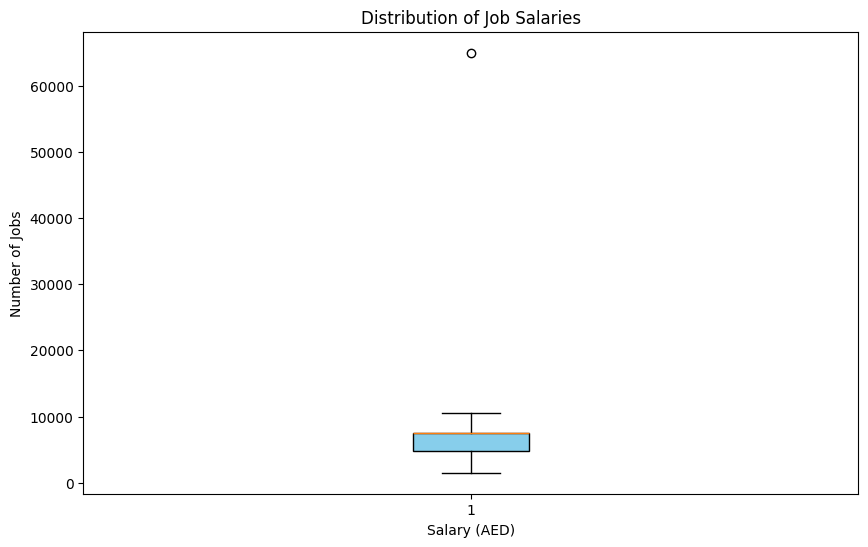

In [11]:
# Plot a boxplot of the job salaries to visualize the distribution and check for outliers
fig = plt.figure(figsize=(10, 6))
plt.boxplot(df['job_salary'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Salary (AED)')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Job Salaries')
plt.show()

In [12]:
#remove outliers using IQR
Q1 = df['job_salary'].quantile(0.25)
Q3 = df['job_salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['job_salary'] < (Q1 - 1.5 * IQR)) |(df['job_salary'] > (Q3 + 1.5 * IQR)))]
df.reset_index(drop=True, inplace=True)

In [39]:
#Save clean data as csv to a new file
df.to_csv("glassdoorjobs_cleaned.csv", index=False)

In [4]:
df1 = pd.read_csv("glassdoorjobs_cleaned.csv")
df1.head()

,company_name,job_title,job_location,job_salary,job_description
0,VIVO HEALTH,Cosmetic Dermatologist on Revenue Basis,Sharjah,7452.380952,*Valid medical license* to practice as a derma...
1,Anaat Beauty Spa & Salon,Nail Technician (Artist),Ras al-Khaimah,4000.000000,"2 - 5 years of experience as a Nail Artist, wi..."
2,Gerbou,Head Hostesss,Dubai,5500.000000,Ensure the *seating process is smooth and effi...
3,7 Emirates Real Estate,Senior Property Consultant,Dubai,3500.000000,*Must have a Valid Dubai driving license*. Con...
4,Confidential,Nail Technician,Abu Dhabi,3500.000000,Candidate needs to be Available To start Immed...


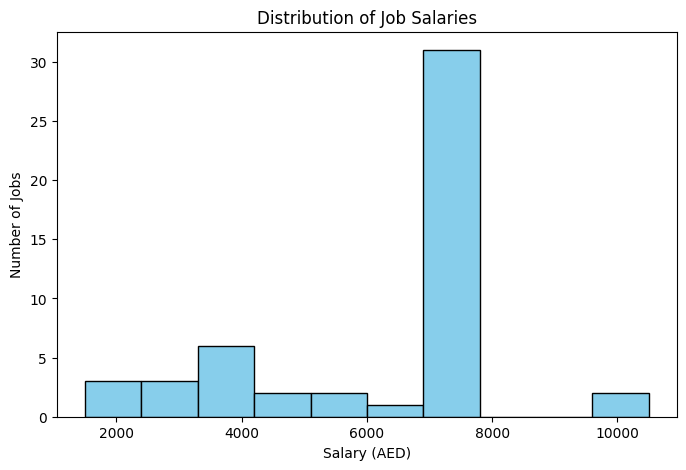

In [16]:
#PLot histogram of the salary to visualize the distribution
fig = plt.figure(figsize=(8, 5))
plt.hist(df1['job_salary'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Salary (AED)')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Job Salaries')
plt.show()

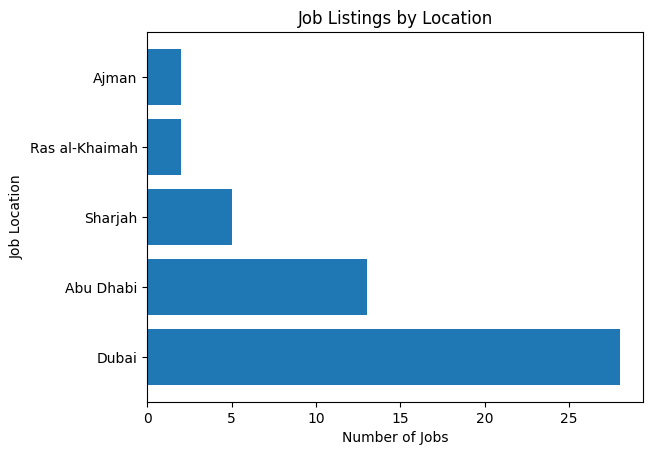

In [25]:
# Job listing by location
location_counts = df1['job_location'].value_counts()
plt.barh(location_counts.index, location_counts.values)
plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
plt.title('Job Listings by Location')
plt.show()

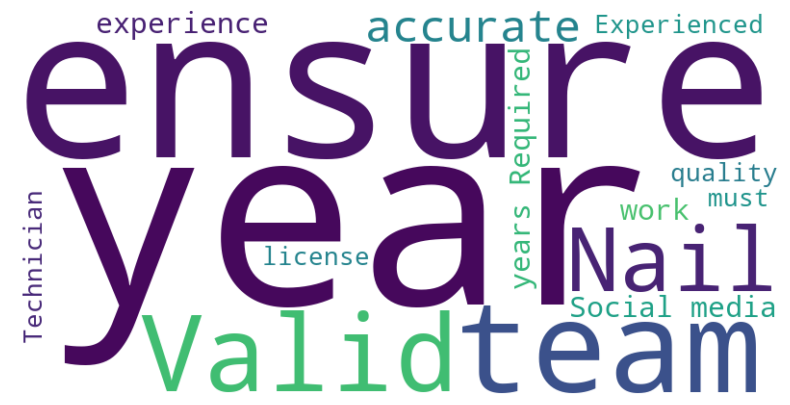

In [10]:
from wordcloud import WordCloud, STOPWORDS

# Combine all job descriptions into one long string
text = ' '.join(df1['job_description'].dropna())  # Drop NaN if any
#remove unnecessary words
custom_stopwords = set(STOPWORDS).union({'hellip', 'Dubai', 'UAE'})
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords, max_words=15).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()
